## Import module

In [1]:
import numpy as np  # 수학적 계산을 위한 numpy 라이브러리 임포트
import pandas as pd  # 데이터 처리 및 CSV 파일 입출력을 위한 pandas 라이브러리 임포트

import os  # 운영 체제와의 상호작용을 위한 os 라이브러리 임포트

# os.walk를 사용하여 설정한 디렉토리의 모든 하위 디렉토리를 탐색
for dirname, _, filenames in os.walk('./severstal-steel-defect-detection'):
    # 해당 디렉토리의 파일 목록을 가져옴
    for filename in filenames:
        # 각 파일의 전체 경로를 출력
        print(os.path.join(dirname, filename))
        break  # 첫 번째 파일 경로만 출력하고 반복문 종료

./severstal-steel-defect-detection\sample_submission.csv
./severstal-steel-defect-detection\test_images\0000f269f.jpg
./severstal-steel-defect-detection\train_images\0002cc93b.jpg


In [2]:
# 모듈 설치
# !pip install ultralytics -q

In [2]:
DATASET_PATH = os.path.join(".", "severstal-steel-defect-detection")  # 데이터셋의 기본 경로 설정
TRAIN_IMAGE_DATASET_PATH = os.path.join(DATASET_PATH, "train_images")  # 학습용 이미지 데이터셋 경로 설정
TEST_IMAGE_DATASET_PATH = os.path.join(DATASET_PATH, "test_images")  # 테스트용 이미지 데이터셋 경로 설정

init_dir = os.getcwd()  # 현재 작업 디렉토리를 저장

In [3]:
import glob  # 파일 경로 및 이름 패턴을 처리하기 위한 glob 라이브러리 임포트

# 학습 이미지 파일 목록을 glob을 사용하여 가져오고, 이름을 정렬
train_img_names = sorted(glob.glob(TRAIN_IMAGE_DATASET_PATH + '/' + "*.jpg"))

# 테스트 이미지 파일 목록을 glob을 사용하여 가져오고, 이름을 정렬
test_img_names = sorted(glob.glob(TEST_IMAGE_DATASET_PATH + '/' + "*.jpg"))

# 학습 이미지 파일의 개수를 출력
print(len(train_img_names))

# 테스트 이미지 파일의 개수를 출력
print(len(test_img_names))


12568
5506


In [4]:
train_df_b = pd.read_csv(DATASET_PATH + "/train.csv")  # 학습 데이터에 대한 CSV 파일을 읽어 데이터프레임으로 로드
train_df_b['ClassId'] = train_df_b['ClassId'].astype(int)  # 'ClassId' 열의 데이터를 정수형으로 변환

In [5]:
# train_df_b["ClassId"].value_counts().plot(kind = 'bar')
# 주석 처리된 코드: 'ClassId' 열의 값이 얼마나 자주 나타나는지 세어 막대 그래프로 시각화

# train_df_b.groupby(['ClassId'])['ClassId'].count()
# 주석 처리된 코드: 'ClassId'로 그룹화하여 각 그룹의 'ClassId' 수를 세는 코드

train_df_b["ClassId"].value_counts()  # 'ClassId' 열의 값이 나타나는 빈도수를 계산하여 반환

ClassId
3    5150
1     897
4     801
2     247
Name: count, dtype: int64

In [6]:
# train_df_b.groupby(['ClassId'])['ClassId'].count().sum()
# 주석 처리된 코드: 'ClassId'로 그룹화한 후 각 그룹의 'ClassId' 수를 세고, 그 수의 총합을 계산

train_df_b["ClassId"].value_counts().sum()  # 'ClassId' 열의 값 빈도수의 총합을 계산

7095

In [7]:
train_df_b['ImageId'].nunique()  # 'ImageId' 열에서 고유한 값의 개수를 계산

6666

In [8]:
# train_df_b.groupby(['ImageId'])['ImageId'].count().max()
# 주석 처리된 코드: 'ImageId'로 그룹화한 후 각 그룹에서 'ImageId'의 개수를 세고, 그 중 가장 큰 값을 반환

train_df_b["ImageId"].value_counts().max()  # 'ImageId' 열에서 가장 많이 나타나는 값의 빈도수를 반환

3

In [42]:
train_df_b['ImageId'].value_counts().value_counts()

count
1    6239
2     425
3       2
Name: count, dtype: int64

In [9]:
train_df_b.groupby(['ImageId'])['ImageId'].filter(lambda x: len(x) > 1).count()  # 'ImageId'로 그룹화한 후, 그룹 크기가 1보다 큰 'ImageId'만 필터링하여 그 수를 계산

856

In [10]:
train_df_b.groupby(['ImageId'])['ImageId'].filter(lambda x: len(x) > 2)  # 'ImageId'로 그룹화한 후, 그룹 크기가 2보다 큰 'ImageId'만 필터링하여 반환

6101    db4867ee8.jpg
6102    db4867ee8.jpg
6103    db4867ee8.jpg
6650    ef24da2ba.jpg
6651    ef24da2ba.jpg
6652    ef24da2ba.jpg
Name: ImageId, dtype: object

In [11]:
train_df_b.loc[train_df_b['ImageId'].isin(['db4867ee8.jpg'])]  # 'ImageId'가 'db4867ee8.jpg'인 모든 행을 필터링하여 반환

,ImageId,ClassId,EncodedPixels
6101,db4867ee8.jpg,1,349941 2 350194 6 350447 11 350700 15 350953 1...
6102,db4867ee8.jpg,2,354411 17 354634 50 354857 82 355096 99 355351...
6103,db4867ee8.jpg,3,233729 3008 236801 64


In [12]:
train_df_b.groupby(['ImageId', 'ClassId'])['ImageId'].count().max()  # 'ImageId'와 'ClassId'로 그룹화한 후, 각 그룹의 'ImageId' 개수를 세고 그 중 가장 큰 값을 반환

1

In [44]:
train_df_b.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [13]:
train_df = train_df_b.pivot(index='ImageId', columns='ClassId', values='EncodedPixels')  # 'ImageId'를 인덱스로, 'ClassId'를 열로, 'EncodedPixels'을 값으로 하는 피벗 테이블 생성
train_df['count'] = train_df.count(axis=1)  # 각 'ImageId'에 대해 결측값이 아닌 'EncodedPixels'의 개수를 세어 'count' 열에 저장
train_df  # 결과 피벗 테이블을 출력

ClassId,1,2,3,4,count
ImageId,,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1
000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,NaN,NaN,NaN,1
000f6bf48.jpg,NaN,NaN,NaN,131973 1 132228 4 132483 6 132738 8 132993 11 ...,1
0014fce06.jpg,NaN,NaN,229501 11 229741 33 229981 55 230221 77 230468...,NaN,1
...,...,...,...,...,...
ffcf72ecf.jpg,NaN,NaN,121911 34 122167 101 122422 169 122678 203 122...,NaN,1
fff02e9c5.jpg,NaN,NaN,207523 3 207777 9 208030 15 208283 22 208537 2...,NaN,1
fffe98443.jpg,NaN,NaN,105929 5 106177 14 106424 24 106672 33 106923 ...,NaN,1


In [14]:
import cv2  # OpenCV 라이브러리 임포트, 이미지 처리와 컴퓨터 비전 작업을 위한 라이브러리

# 주어진 행 ID(row_id)와 데이터프레임(df)을 사용하여 이미지와 해당 마스크를 읽어들이는 함수
def read_image_with_masks(row_id, df):
    
    fname_o = df.iloc[row_id].name  # 주어진 행의 인덱스 값, 즉 이미지 파일 이름을 가져옴
    fname = TRAIN_IMAGE_DATASET_PATH + '/' + fname_o  # 이미지 파일의 전체 경로 생성
    onlyname = fname_o.split('.')[0]  # 파일 이름에서 확장자를 제거한 순수 이름을 가져옴
    
    labels = df.iloc[row_id][:4]  # 주어진 행에서 첫 4개의 클래스에 해당하는 레이블들을 가져옴
    image = cv2.imread(fname)  # 이미지 파일을 읽어옴
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 이미지를 BGR에서 RGB로 색상 변환
    shape = image.shape  # 이미지의 형태(높이, 너비, 채널 수)를 가져옴

    list_names = []  # 클래스 이름을 저장할 리스트 초기화
    list_with_all_masks = []  # 모든 마스크를 저장할 리스트 초기화

    # 각 클래스 레이블에 대해 반복
    for classname, label in enumerate(labels.values):
        if label is not np.nan:  # 레이블이 NaN이 아닌 경우에만 처리
            string_array = label.rstrip().split()  # 레이블 문자열을 공백으로 나누어 리스트로 변환
            int_array = [int(string) for string in string_array]  # 문자열 리스트를 정수 리스트로 변환
            binary_mask = create_mask(int_array, shape)  # 정수 리스트와 이미지 형태를 사용하여 마스크 생성
            list_with_all_masks.append(binary_mask)  # 생성된 마스크를 리스트에 추가
            list_names.append(int(classname))  # 클래스 이름을 리스트에 추가
                
    return fname, onlyname, image, list_with_all_masks, list_names  # 파일 이름, 이미지 이름, 이미지, 마스크 리스트, 클래스 이름 리스트를 반환

# 주어진 정수 배열과 이미지 형태를 사용하여 바이너리 마스크를 생성하는 함수
def create_mask(int_array, shape):
    
    result = np.zeros((shape[0], shape[1]), dtype=np.float32)  # 이미지와 동일한 형태의 0으로 채워진 결과 배열 초기화
    positions = map(int, int_array[0::2])  # 정수 배열에서 시작 위치를 가져옴 (짝수 인덱스)
    length = map(int, int_array[1::2])  # 정수 배열에서 길이를 가져옴 (홀수 인덱스)
    mask = np.zeros(shape[0] * shape[1], dtype=np.uint8)  # 전체 이미지 크기에 해당하는 0으로 채워진 1차원 배열 초기화

    # 각 시작 위치와 길이에 대해 반복
    for pos, le in zip(positions, length):
        mask[pos:(pos + le)] = 1  # 마스크 배열의 해당 위치에 1을 채워서 마스크 생성

    result[:, :] = mask.reshape(shape[0], shape[1], order='F')  # 1차원 마스크 배열을 2차원으로 변환하여 결과 배열에 채움
    
    binary_mask = result.astype(np.uint8)  # 결과 배열을 8비트 정수형으로 변환하여 바이너리 마스크 생성
    return binary_mask  # 생성된 바이너리 마스크를 반환


In [15]:
# 마스크와 클래스 레이블을 받아서 YOLO 스타일의 세그멘테이션 좌표와 클래스 레이블을 반환하는 함수
def convert_masks_to_xy(masks, class_labels):

    list_with_all_masks = []  # 모든 마스크의 폴리곤 좌표를 저장할 리스트 초기화
    list_names = []  # 각 마스크에 해당하는 클래스 레이블을 저장할 리스트 초기화
    
    for i, mask in enumerate(masks):  # 각 마스크와 해당 인덱스를 반복
        xy_arr = convert_mask_to_polygons(mask)  # 마스크를 폴리곤 좌표로 변환
        for xy_sequence in xy_arr:  # 각 폴리곤 좌표 시퀀스를 반복
            list_with_all_masks.append(xy_sequence)  # 폴리곤 좌표를 리스트에 추가
            list_names.append(int(class_labels[i]))  # 해당 폴리곤의 클래스 레이블을 리스트에 추가
            
    return list_with_all_masks, list_names  # 폴리곤 좌표 리스트와 클래스 레이블 리스트 반환

def convert_mask_to_polygons(binary_mask) -> list[list[int | float]]:
    """세그멘테이션 목적을 위해 YOLO 스타일의 주석 목록을 반환.
    [
        [x1, y1, x2, y2, ..., xn, yn], # object_0
        [x1, y1, x2, y2, ..., xn, yn], # object_1
        ...,
        [x1, y1, x2, y2, ..., xn, yn] # object_m
    ]
    """
    annotations = []  # YOLO 스타일의 주석을 저장할 리스트 초기화

    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)
    # 바이너리 마스크에서 외곽선(윤곽선)을 찾음. cv2.RETR_EXTERNAL은 가장 외부 윤곽만 찾음.
    # cv2.CHAIN_APPROX_TC89_KCOS는 윤곽선을 단순화하는 알고리즘.

    wh = np.flip(np.array(binary_mask.shape))  # 마스크의 너비와 높이를 가져와서 배열의 순서를 뒤집음 (정규화를 위해)
    
    for contour in contours:  # 각 윤곽선에 대해 반복
        epsilon = 0.001 * cv2.arcLength(contour, True)  # 윤곽선의 호 길이의 0.1%를 허용 오차로 사용하여 윤곽선을 근사화
        contour_approx = cv2.approxPolyDP(contour, epsilon, True)  # 근사화된 다각형을 생성
        
        contour_approx = contour_approx / wh  # 윤곽선 좌표를 너비와 높이로 정규화하여 0-1 범위로 변환
        
        polygon = contour_approx.flatten().tolist()  # 정규화된 좌표를 1차원 리스트로 변환하여 YOLO 형식으로 만듦
        annotations.append(polygon)  # 다각형을 주석 리스트에 추가
    
    return annotations  # 생성된 YOLO 스타일의 주석 리스트 반환
    

In [16]:
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 matplotlib 라이브러리 임포트

def visualize(image, keypoints):
    # 이미지를 입력받아 주어진 키포인트(다각형 좌표)를 이미지에 시각화하여 표시하는 함수
    
    h, w = image.shape[:2]  # 이미지의 높이와 너비를 추출
    cpy = image.copy()  # 원본 이미지를 수정하지 않기 위해 복사본 생성
    
    for keypoint in keypoints:  # 각 키포인트에 대해 반복
        poly = np.asarray(keypoint, dtype=np.float16).reshape(-1, 2)  # 키포인트를 numpy 배열로 변환하고, (x, y) 좌표로 재구성
        poly *= [w, h]  # 다각형 좌표를 이미지 크기에 맞게 스케일 조정
        
        cv2.polylines(cpy, [poly.astype('int')], True, (255, 0, 0), 2)  # 다각형을 이미지에 그려줌. 파란색(BGR: 255, 0, 0)으로 그리며, 두께는 2픽셀
    
    plt.figure(figsize=(12, 12))  # 출력할 플롯의 크기를 설정
    plt.axis('off')  # 축을 숨김
    plt.imshow(cpy)  # 이미지 출력


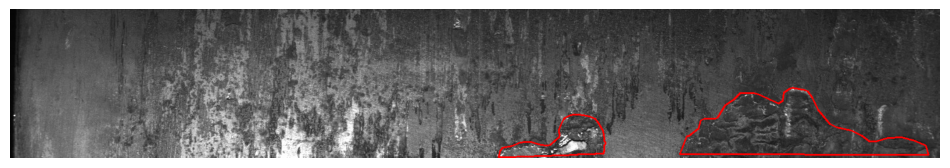

In [17]:
from PIL import Image, ImageDraw  # PIL (Python Imaging Library) 라이브러리에서 Image와 ImageDraw 모듈을 임포트

row_id = 13  # 시각화할 데이터의 행 ID 설정

# 주어진 행 ID와 데이터프레임(train_df)을 사용하여 이미지와 해당 마스크, 클래스 레이블을 읽어옴
fname, onlyname, image, masks, class_labels = read_image_with_masks(row_id, train_df)

# 마스크를 다각형 좌표로 변환하고, 해당 클래스 레이블을 반환
keypoints, class_labels = convert_masks_to_xy(masks, class_labels)

# 원본 이미지에 다각형 좌표를 그려 시각화
visualize(image, keypoints)

# 주석 처리된 부분: PIL을 사용해 이미지와 다각형 좌표를 시각화하는 대안 방법
# img = Image.fromarray(image)  # Numpy 배열 형식의 이미지를 PIL 이미지로 변환
# h, w = image.shape[:2]  # 이미지의 높이와 너비를 추출
# draw = ImageDraw.Draw(img)  # 이미지 위에 그리기 위해 Draw 객체 생성
# for polygon in keypoints:  # 각 다각형 좌표에 대해 반복
#     draw.polygon(polygon, outline=(0,255,0), width=5)  # 다각형을 녹색(0, 255, 0)으로 그려줌, 선 너비는 5픽셀
# img  # 이미지를 출력


In [18]:
from sklearn.model_selection import train_test_split  # 데이터 분할을 위한 scikit-learn 라이브러리에서 train_test_split 함수 임포트

# 데이터프레임(train_df)을 학습(train)과 검증(validation) 세트로 분할
train_df_n, val_df_n = train_test_split(
    train_df,  # 입력 데이터프레임
    test_size=0.1,  # 검증 세트의 크기를 전체 데이터의 10%로 설정
    stratify=train_df["count"],  # 'count' 열을 기준으로 층화 샘플링(stratified sampling)을 수행
    random_state=54  # 랜덤 시드 고정으로 결과 재현성 확보
)

# 주석 처리된 대체 코드:
# train_df_n, val_df_n = train_test_split(train_df, test_size=0.9, stratify=train_df["count"], random_state=54)
# 데이터프레임(train_df)을 90% 검증 세트와 10% 학습 세트로 분할, 'count' 열을 기준으로 층화 샘플링

# train_df_n, val_df_n = train_test_split(train_df_n, test_size=0.1, random_state=54)
# 첫 번째 분할 후의 학습 세트(train_df_n)를 다시 학습 및 검증 세트로 분할, 이번에는 층화 샘플링 없이 수행

# 분할된 데이터프레임의 크기(행 수)를 출력
print([len(train_df_n), len(val_df_n)])


[5999, 667]


In [45]:
train_df.head()

ClassId,1,2,3,4,count
ImageId,,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1
000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,NaN,NaN,NaN,1
000f6bf48.jpg,NaN,NaN,NaN,131973 1 132228 4 132483 6 132738 8 132993 11 ...,1
0014fce06.jpg,NaN,NaN,229501 11 229741 33 229981 55 230221 77 230468...,NaN,1


In [19]:
import cv2  # OpenCV 라이브러리 임포트, 이미지 처리 및 컴퓨터 비전 작업에 사용
from PIL import Image, ImageDraw  # 이미지 작업을 위한 Python Imaging Library(PIL) 모듈 임포트
import albumentations as A  # 데이터 증강을 위한 Albumentations 라이브러리 임포트

img_size = 640  # 이미지 크기 설정 (가로와 세로 모두 640 픽셀)

# 학습 데이터에 사용할 데이터 증강 파이프라인 정의
train_transform = A.Compose([
    # A.CenterCrop(smallsize, smallsize),  # 주석 처리된 코드: 이미지의 중심을 기준으로 작은 크기로 자르기
    A.Resize(width=img_size, height=img_size),  # 이미지를 지정된 크기(img_size x img_size)로 리사이즈
    A.HorizontalFlip(p=0.5),  # 이미지를 50% 확률로 수평으로 뒤집기
    A.VerticalFlip(p=0.5),  # 이미지를 50% 확률로 수직으로 뒤집기
    A.ShiftScaleRotate(shift_limit=0.25, scale_limit=0.25, rotate_limit=45, p=0.5),  # 이미지를 임의로 이동, 크기 조정 및 회전 (50% 확률)
    A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),  # 이미지의 RGB 채널 값을 임의로 변경 (50% 확률)
    A.RandomBrightnessContrast(p=0.5),  # 이미지의 밝기와 대비를 임의로 변경 (50% 확률)
    # A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),  # 주석 처리된 코드: RGB 채널 값 변경 (30% 확률)
])

# 검증 데이터에 사용할 데이터 변환 파이프라인 정의
val_transform = A.Compose([
    # A.CenterCrop(smallsize, smallsize),  # 주석 처리된 코드: 이미지의 중심을 기준으로 작은 크기로 자르기
    A.Resize(width=img_size, height=img_size),  # 이미지를 지정된 크기(img_size x img_size)로 리사이즈
])


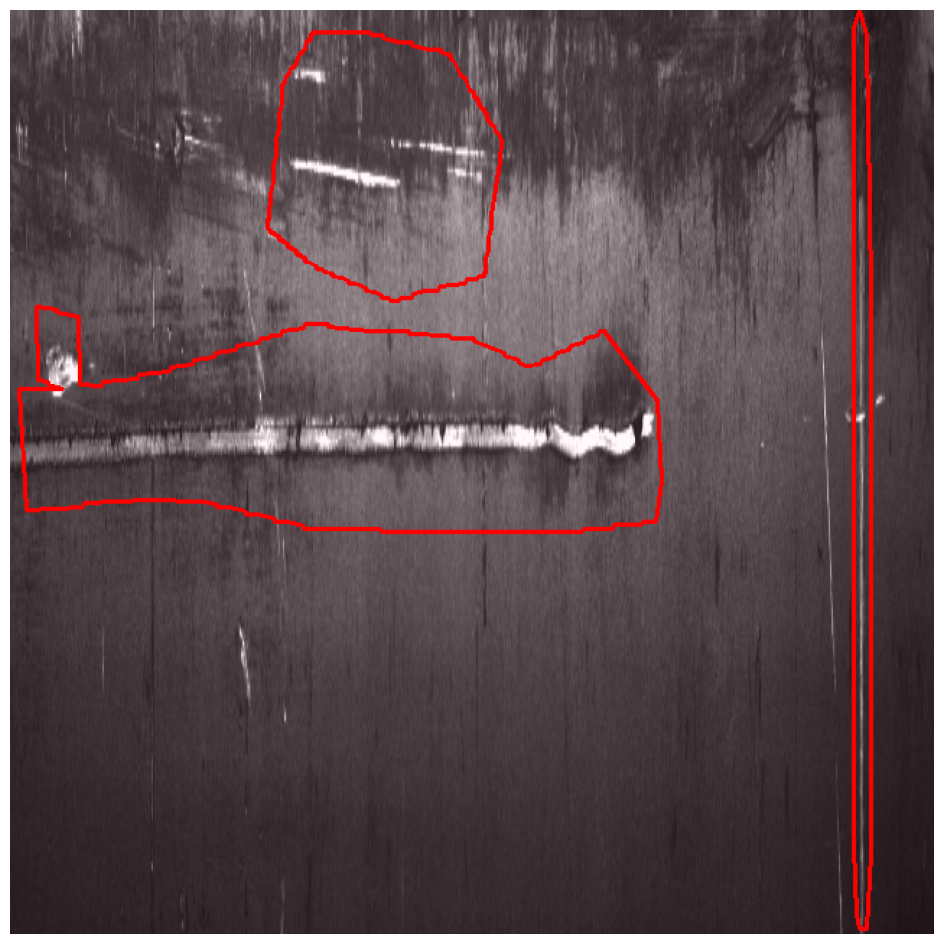

In [47]:
import albumentations as A  # 데이터 증강을 위한 Albumentations 라이브러리 임포트
import cv2  # OpenCV 라이브러리 임포트, 이미지 처리와 컴퓨터 비전 작업을 위해 사용

# 특정 이미지의 행 위치를 가져오는 코드 (주석 처리된 부분)
# row_id = train_df_n.index.get_loc('d0fb25531.jpg')  # 'd0fb25531.jpg' 파일의 인덱스를 기반으로 행 ID를 가져옴
row_id = 2  # 수동으로 행 ID를 1로 설정

# 주어진 행 ID와 데이터프레임(train_df_n)을 사용하여 이미지와 해당 마스크, 클래스 레이블을 읽어옴
fname, onlyname, image, masks, class_labels = read_image_with_masks(row_id, train_df_n)

# 정의된 데이터 증강 파이프라인(train_transform)을 사용하여 이미지와 마스크에 증강 적용
transformed = train_transform(image=image, masks=masks)  # 이미지를 증강시키고 마스크에도 동일한 변환을 적용
transformed_image = transformed['image']  # 증강된 이미지를 추출
transformed_masks = transformed['masks']  # 증강된 마스크를 추출

# 증강된 마스크를 다각형 좌표 형태로 변환하고, 변환된 클래스 레이블을 반환
transformed_keypoints, transformed_class_labels = convert_masks_to_xy(transformed_masks, class_labels)

# 주석 처리된 코드: 변환된 키포인트를 출력
# print(transformed_keypoints)

# 증강된 이미지에 변환된 다각형 좌표를 그려 시각화
visualize(transformed_image, transformed_keypoints)


In [21]:
import os  # 운영 체제와 상호작용하기 위한 os 라이브러리 임포트
import shutil  # 파일 및 디렉토리 작업을 위한 shutil 라이브러리 임포트

# 'images' 디렉토리가 존재하는지 확인하고, 존재하면 해당 디렉토리를 삭제
if os.path.isdir('images'):
    shutil.rmtree('images')  # 'images' 디렉토리와 그 안의 모든 파일 및 하위 디렉토리를 삭제

# 'labels' 디렉토리가 존재하는지 확인하고, 존재하면 해당 디렉토리를 삭제
if os.path.isdir('labels'):
    shutil.rmtree('labels')  # 'labels' 디렉토리와 그 안의 모든 파일 및 하위 디렉토리를 삭제

# # 새로운 디렉토리 생성 명령어 실행
# # 'images'라는 새로운 디렉토리 생성
# !mkdir images 
# # 'labels'라는 새로운 디렉토리 생성
# !mkdir labels  

# # 학습(train) 및 검증(val) 데이터를 저장할 하위 디렉토리 생성
# # 'images' 디렉토리 안에 'train' 하위 디렉토리 생성
# !mkdir images/train  
# # 'images' 디렉토리 안에 'val' 하위 디렉토리 생성
# !mkdir images/val  
# # !mkdir test  # 주석 처리된 코드: 테스트(test) 데이터를 저장할 디렉토리 생성 명령어

# # 'labels' 디렉토리 안에 'train' 하위 디렉토리 생성
# !mkdir labels/train  
# # 'labels' 디렉토리 안에 'val' 하위 디렉토리 생성
# !mkdir labels/val  
# # !mkdir test  # 주석 처리된 코드: 테스트(test) 데이터를 저장할 디렉토리 생성 명령어


In [46]:
import xml.etree.ElementTree as ET
import os

def save_masks_to_xml(filename, width, height, objects, output_dir):
    # <annotation> 루트 요소 생성
    annotation = ET.Element('annotation')
    
    # <folder> 요소 생성
    folder = ET.SubElement(annotation, 'folder')
    folder.text = 'cr'
    
    # <filename> 요소 생성
    filename_tag = ET.SubElement(annotation, 'filename')
    filename_tag.text = filename
    
    # <source> 요소 생성
    source = ET.SubElement(annotation, 'source')
    database = ET.SubElement(source, 'database')
    database.text = 'NEU-DET'
    
    # <size> 요소 생성
    size = ET.SubElement(annotation, 'size')
    width_tag = ET.SubElement(size, 'width')
    width_tag.text = str(width)
    height_tag = ET.SubElement(size, 'height')
    height_tag.text = str(height)
    depth_tag = ET.SubElement(size, 'depth')
    depth_tag.text = '1'  # 흑백 이미지로 가정
    
    # <segmented> 요소 생성
    segmented = ET.SubElement(annotation, 'segmented')
    segmented.text = '0'
    
    # 각 객체에 대한 <object> 요소 생성
    for obj in objects:
        object_tag = ET.SubElement(annotation, 'object')
        name = ET.SubElement(object_tag, 'name')
        name.text = obj['name']  # 클래스 이름
        pose = ET.SubElement(object_tag, 'pose')
        pose.text = 'Unspecified'
        truncated = ET.SubElement(object_tag, 'truncated')
        truncated.text = '1'
        difficult = ET.SubElement(object_tag, 'difficult')
        difficult.text = '0'
        
        # <bndbox> 요소 생성
        bndbox = ET.SubElement(object_tag, 'bndbox')
        xmin = ET.SubElement(bndbox, 'xmin')
        xmin.text = str(obj['bndbox']['xmin'])
        ymin = ET.SubElement(bndbox, 'ymin')
        ymin.text = str(obj['bndbox']['ymin'])
        xmax = ET.SubElement(bndbox, 'xmax')
        xmax.text = str(obj['bndbox']['xmax'])
        ymax = ET.SubElement(bndbox, 'ymax')
        ymax.text = str(obj['bndbox']['ymax'])
    
    # XML 트리를 파일로 저장
    tree = ET.ElementTree(annotation)
    output_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.xml")
    tree.write(output_path, encoding='utf-8', xml_declaration=True)


In [22]:
def transform_element(transformM, image, masks, class_labels, onlyname, outdir1, outdir2, img_size, ii=None):
    # 이미지와 마스크에 변환 적용 (class_labels 제거)
    transformed = transformM(image=image, masks=masks)  # 변환 적용
    transformed_image = transformed['image']  # 변환된 이미지 추출
    transformed_masks = transformed['masks']  # 변환된 마스크 추출
    transformed_class_labels = class_labels  # class_labels를 그대로 사용
    
    transformed_name = onlyname
    if ii:
        transformed_name += '_'+str(ii)
    nn = os.path.basename(os.path.normpath(transformed_name))
    
    # 변환된 이미지를 저장
    cv2.imwrite(outdir1 + nn + '.jpg', cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))  
    
    # 마스크 데이터를 텍스트 파일로 저장 (기존 방식)
    out_file = open(outdir2 + nn + '.txt', 'w')  # 변환된 레이블을 저장할 텍스트 파일 열기

    # 변환된 마스크를 다각형 좌표로 변환하고, 변환된 클래스 레이블 반환
    transformed_keypoints, transformed_class_labels = convert_masks_to_xy(transformed_masks, transformed_class_labels)
    
    objects = []  # 객체 정보를 담을 리스트
    
    for iii in range(len(transformed_keypoints)):
        kOut = transformed_keypoints[iii]
        clOut = transformed_class_labels[iii]
        
        if len(kOut) < 6:  # 좌표가 너무 적으면 무시
            continue
            
        text = str(clOut) + " " + " ".join([str(b) for b in kOut]) + '\n'
        out_file.write(text)
        
        # 텍스트 파일 뿐 아니라 XML에 사용할 객체 정보 수집
        xmin, ymin = min(kOut[::2]), min(kOut[1::2])
        xmax, ymax = max(kOut[::2]), max(kOut[1::2])
        
        objects.append({
            'name': clOut,  # 클래스 레이블 (예: 'crazing')
            'bndbox': {'xmin': xmin, 'ymin': ymin, 'xmax': xmax, 'ymax': ymax}
        })
    
    out_file.close()

    # XML 파일로 마스크 데이터 저장
    save_masks_to_xml(nn + '.jpg', img_size[0], img_size[1], objects, outdir2)  # XML로 저장


In [23]:
outdir1 = "./images/train/"  # 변환된 이미지 파일을 저장할 디렉토리 경로 설정
outdir2 = "./labels/train/"  # 변환된 레이블 파일을 저장할 디렉토리 경로 설정

AUG_COUNT = 5  # 데이터 증강 횟수 설정

# 학습 데이터셋(train_df_n)의 모든 행에 대해 반복
for i in range(len(train_df_n)):
    # 주어진 인덱스 i와 데이터프레임(train_df_n)을 사용하여 이미지와 해당 마스크, 클래스 레이블을 읽어옴
    fname, onlyname, image, masks, class_labels = read_image_with_masks(i, train_df_n)
    
    # 검증용 변환(val_transform)을 적용하여 이미지와 레이블을 변환하고 저장
    transform_element(val_transform, image, masks, class_labels, onlyname, outdir1, outdir2, img_size)
    
    # 설정된 증강 횟수(AUG_COUNT)만큼 반복
    for ii in range(AUG_COUNT):
        # 학습용 변환(train_transform)을 적용하여 증강된 이미지와 레이블을 변환하고 저장
        transform_element(train_transform, image, masks, class_labels, onlyname, outdir1, outdir2, img_size, ii)


In [24]:
outdir1 = "./images/val/"  # 변환된 검증 이미지 파일을 저장할 디렉토리 경로 설정
outdir2 = "./labels/val/"  # 변환된 검증 레이블 파일을 저장할 디렉토리 경로 설정

# 검증 데이터셋(val_df_n)의 모든 행에 대해 반복
for i in range(len(val_df_n)):
    # 주어진 인덱스 i와 데이터프레임(val_df_n)을 사용하여 이미지와 해당 마스크, 클래스 레이블을 읽어옴
    fname, onlyname, image, masks, class_labels = read_image_with_masks(i, val_df_n)
    
    # 검증용 변환(val_transform)을 적용하여 이미지와 레이블을 변환하고 저장
    transform_element(val_transform, image, masks, class_labels, onlyname, outdir1, outdir2, img_size)


In [25]:
f = open("./train.yaml", "w")  # 'train.yaml' 파일을 쓰기 모드로 열기

# 데이터셋의 경로와 학습 및 검증 데이터 디렉토리를 YAML 파일에 기록
f.write('path: ' + init_dir + "\n")  # 데이터셋의 기본 경로를 'path' 키로 추가
f.write('train: images/train' + "\n")  # 학습 데이터의 경로를 'train' 키로 추가
f.write('val: images/val' + "\n")  # 검증 데이터의 경로를 'val' 키로 추가
# f.write('test: images/test' + "\n")  # 주석 처리된 코드: 테스트 데이터의 경로를 'test' 키로 추가
# f.write('nc: 4' + "\n")  # 주석 처리된 코드: 클래스 수를 'nc' 키로 추가

# 클래스 이름을 YAML 파일에 기록
f.write('names:' + "\n")  # 클래스 이름을 정의하는 'names' 키 추가
f.write('  0: 0' + "\n")  # 클래스 0의 이름을 '0'으로 설정
f.write('  1: 1' + "\n")  # 클래스 1의 이름을 '1'으로 설정
f.write('  2: 2' + "\n")  # 클래스 2의 이름을 '2'으로 설정
f.write('  3: 3' + "\n")  # 클래스 3의 이름을 '3'으로 설정
f.write('  4: 4' + "\n")  # 클래스 4의 이름을 '4'으로 설정
f.close()  # 파일을 닫아 변경 사항을 저장


In [26]:
a = """
# Ultralytics YOLO 🚀, AGPL-3.0 license
# YOLOv8-seg instance segmentation model. For Usage examples see https://docs.ultralytics.com/tasks/segment

# Parameters
nc: 5  # number of classes
scales: # model compound scaling constants, i.e. 'model=yolov8n-seg.yaml' will call yolov8-seg.yaml with scale 'n'
  # [depth, width, max_channels]
  n: [0.33, 0.25, 1024]
  s: [0.33, 0.50, 1024]
  m: [0.67, 0.75, 768]
  l: [1.00, 1.00, 512]
  x: [1.00, 1.25, 512]

# YOLOv8.0n backbone
backbone:
  # [from, repeats, module, args]
  - [-1, 1, Conv, [64, 3, 2]]  # 0-P1/2
  - [-1, 1, Conv, [128, 3, 2]]  # 1-P2/4
  - [-1, 3, C2f, [128, True]]
  - [-1, 1, Conv, [256, 3, 2]]  # 3-P3/8
  - [-1, 6, C2f, [256, True]]
  - [-1, 1, Conv, [512, 3, 2]]  # 5-P4/16
  - [-1, 6, C2f, [512, True]]
  - [-1, 1, Conv, [1024, 3, 2]]  # 7-P5/32
  - [-1, 3, C2f, [1024, True]]
  - [-1, 1, SPPF, [1024, 5]]  # 9

# YOLOv8.0n head
head:
  - [-1, 1, nn.Upsample, [None, 2, 'nearest']]
  - [[-1, 6], 1, Concat, [1]]  # cat backbone P4
  - [-1, 3, C2f, [512]]  # 12

  - [-1, 1, nn.Upsample, [None, 2, 'nearest']]
  - [[-1, 4], 1, Concat, [1]]  # cat backbone P3
  - [-1, 3, C2f, [256]]  # 15 (P3/8-small)

  - [-1, 1, Conv, [256, 3, 2]]
  - [[-1, 12], 1, Concat, [1]]  # cat head P4
  - [-1, 3, C2f, [512]]  # 18 (P4/16-medium)

  - [-1, 1, Conv, [512, 3, 2]]
  - [[-1, 9], 1, Concat, [1]]  # cat head P5
  - [-1, 3, C2f, [1024]]  # 21 (P5/32-large)

  - [[15, 18, 21], 1, Segment, [nc, 32, 256]]  # Segment(P3, P4, P5)"""

# 'yolov8-seg.yaml' 파일을 쓰기 모드로 열기
f = open("yolov8-seg.yaml", "w")
f.write(a)  # 문자열 'a'를 파일에 작성
f.close()  # 파일 닫기

In [27]:
!wandb off

'wandb'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [28]:
# './runs/segment/train' 디렉토리가 존재하는지 확인
if os.path.isdir('./runs/segment/train'):
    # 디렉토리가 존재하면 해당 디렉토리와 그 안의 모든 파일 및 하위 디렉토리를 삭제
    shutil.rmtree('./runs/segment/train')


In [29]:
from ultralytics import YOLO  # Ultralytics YOLO 라이브러리에서 YOLO 클래스를 임포트

# 'yolov8n-seg.yaml' 파일을 사용하여 YOLO 모델 초기화
model = YOLO('yolov8n-seg.yaml')


In [30]:
# YOLO 모델을 학습시키기 위해 'train.yaml' 파일을 사용하여 훈련을 시작
results = model.train(
    data='train.yaml',  # 학습에 사용할 데이터 세트와 클래스 정보를 정의한 YAML 파일 경로
    epochs=10,          # 모델을 학습시킬 총 에포크 수 설정 (30회 반복 학습)
    batch=32,           # 배치 크기 설정 (한 번의 학습에서 사용할 샘플 수)
    pretrained=False    # 사전 훈련된 가중치를 사용하지 않고 모델을 처음부터 학습
)


Ultralytics YOLOv8.2.83  Python-3.12.4 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6141MiB)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=train.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 6.25M/6.25M [00:00<00:00, 16.7MB/s]


AMP: checks passed 


train: Scanning C:\Users\SSAFY\Desktop\특화\yolo0905\labels\train... 29995 images, 333 backgrounds, 0 corrupt: 100%|██████████| 29995/29995 [00:12<00:00, 2316.80it/s]


train: New cache created: C:\Users\SSAFY\Desktop\\yolo0905\labels\train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\SSAFY\Desktop\특화\yolo0905\labels\val... 667 images, 0 backgrounds, 0 corrupt: 100%|██████████| 667/667 [00:00<00:00, 1294.59it/s]

val: New cache created: C:\Users\SSAFY\Desktop\\yolo0905\labels\val.cache


Plotting labels to c:\Users\SSAFY\Desktop\YOLO\ultralytics\runs\segment\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to c:\Users\SSAFY\Desktop\YOLO\ultralytics\runs\segment\train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10       5.9G      3.161      4.607          4      3.104         32        640: 100%|██████████| 938/938 [07:54<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:14<00:00,  1.35s/it]


                   all        667       2438      0.281     0.0661     0.0203    0.00532      0.283     0.0672     0.0206    0.00497

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.61G      2.366      3.219       2.76      2.114         40        640: 100%|██████████| 938/938 [07:29<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:10<00:00,  1.02it/s]


                   all        667       2438      0.386      0.141     0.0736      0.024      0.387      0.134     0.0676     0.0222

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.78G      2.159      3.041      2.535      1.935         30        640: 100%|██████████| 938/938 [07:03<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:12<00:00,  1.13s/it]


                   all        667       2438      0.424      0.159     0.0894     0.0296      0.376       0.17     0.0656     0.0216

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.79G      2.054      2.937      2.399      1.836         34        640: 100%|██████████| 938/938 [07:29<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:15<00:00,  1.40s/it]


                   all        667       2438      0.513      0.205      0.147     0.0495      0.488       0.19      0.122     0.0418

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.69G       1.96      2.837      2.281      1.766         33        640: 100%|██████████| 938/938 [08:37<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:14<00:00,  1.28s/it]


                   all        667       2438      0.485      0.214      0.147     0.0564      0.453      0.174      0.107     0.0369

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.84G      1.905      2.777      2.195      1.715         36        640: 100%|██████████| 938/938 [07:52<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:15<00:00,  1.37s/it]

                   all        667       2438      0.526      0.228       0.22     0.0885      0.499      0.201       0.18     0.0631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.52G      1.853      2.719      2.121      1.677         23        640: 100%|██████████| 938/938 [09:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:13<00:00,  1.25s/it]


                   all        667       2438      0.528      0.237      0.205     0.0766      0.494      0.209      0.158     0.0551

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.75G      1.819       2.67      2.067      1.652         27        640: 100%|██████████| 938/938 [07:48<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:11<00:00,  1.06s/it]

                   all        667       2438      0.546      0.253      0.248     0.0983      0.519      0.226      0.196     0.0704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.67G      1.781      2.632      2.007      1.626         38        640: 100%|██████████| 938/938 [07:50<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:13<00:00,  1.19s/it]


                   all        667       2438      0.532       0.29      0.258      0.103      0.536      0.233      0.209     0.0772

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10       5.7G      1.745      2.601      1.958      1.604         26        640: 100%|██████████| 938/938 [07:54<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:11<00:00,  1.05s/it]

                   all        667       2438      0.282      0.279      0.252      0.104      0.275      0.218      0.199     0.0719



10 epochs completed in 1.380 hours.
Optimizer stripped from c:\Users\SSAFY\Desktop\YOLO\ultralytics\runs\segment\train\weights\last.pt, 6.8MB
Optimizer stripped from c:\Users\SSAFY\Desktop\YOLO\ultralytics\runs\segment\train\weights\best.pt, 6.8MB

Validating c:\Users\SSAFY\Desktop\YOLO\ultralytics\runs\segment\train\weights\best.pt...
Ultralytics YOLOv8.2.83  Python-3.12.4 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6141MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,259,039 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:11<00:00,  1.03s/it]


                   all        667       2438      0.534      0.289      0.259      0.103       0.54      0.231      0.208     0.0771
                     0         92        365      0.333      0.359      0.279     0.0966      0.338      0.266      0.221     0.0786
                     1         25         45          1     0.0346     0.0981     0.0245          1          0     0.0236    0.00588
                     2        525       1840      0.374      0.417      0.324      0.122      0.381      0.351      0.297      0.112
                     3         68        188      0.431      0.346      0.333      0.168      0.442      0.309      0.292      0.112
Speed: 0.4ms preprocess, 3.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to c:\Users\SSAFY\Desktop\YOLO\ultralytics\runs\segment\train


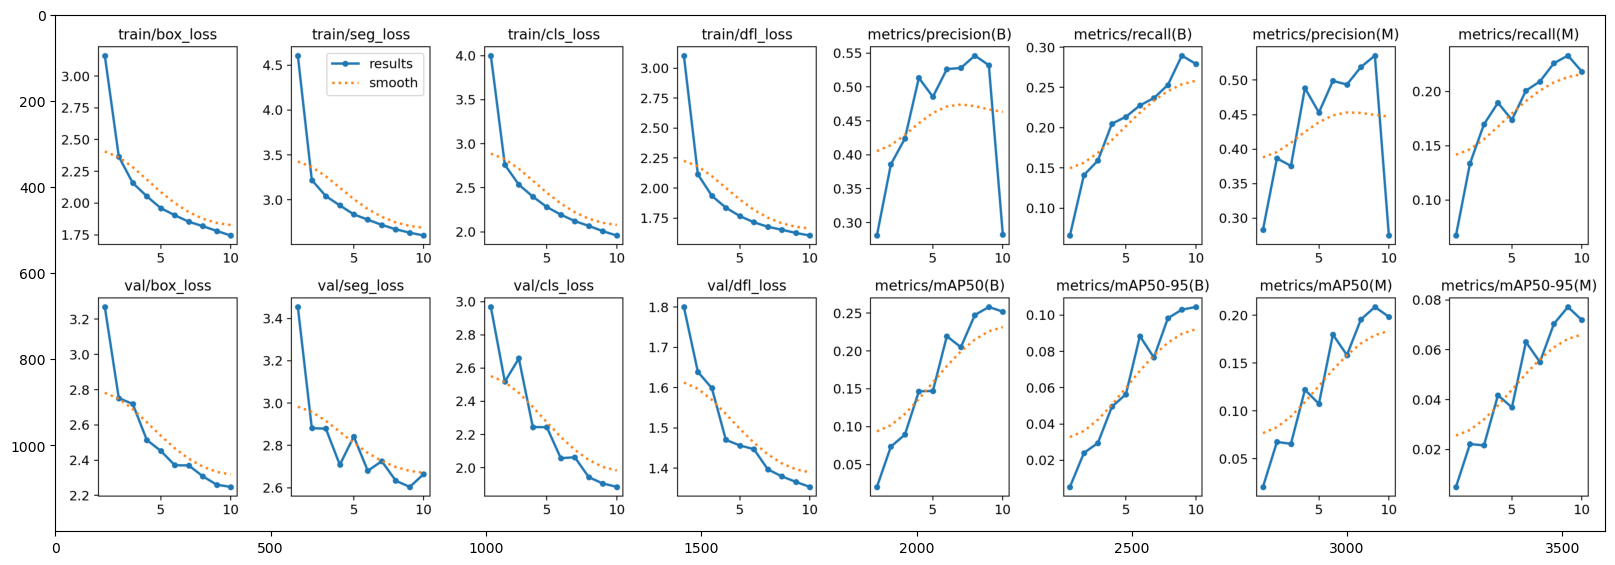

In [32]:
# './runs/segment/train/results.png' 파일에서 이미지를 읽고 NumPy 배열로 변환

image = np.array(Image.open('../../YOLO/ultralytics/runs/segment/train/results.png'))
# image = np.array(Image.open('../YOLO/ultralytics/runs/segment/train/results.png'))
plt.figure(figsize=(20, 20))  # 출력할 이미지의 크기를 20x20인치로 설정
plt.imshow(image)  # 이미지를 플롯에 표시


In [33]:
# https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
def mask2rle(img):
    '''
    img: numpy array, 1 -> mask, 0 -> background
    Returns run length as string formatted
    '''
    # 입력 이미지를 전치(transpose)하고, 1차원으로 평탄화하여 1차원 배열로 변환
    pixels = img.T.flatten()
    
    # 시작과 끝에 0을 추가하여 경계 조건을 추가
    pixels = np.concatenate([[0], pixels, [0]])
    
    # 연속된 값이 바뀌는 지점(마스크의 시작과 끝 지점)을 찾음
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    
    # RLE 인코딩을 위해 시작 지점과 길이로 변환
    runs[1::2] -= runs[::2]
    
    # RLE 결과를 공백으로 구분된 문자열 형태로 반환
    return ' '.join(str(x) for x in runs)


In [34]:
import glob  # 파일 경로 및 이름 패턴을 처리하기 위한 glob 라이브러리 임포트

# TEST_IMAGE_DATASET_PATH 디렉토리에서 확장자가 .jpg인 모든 이미지 파일 경로를 가져와 정렬
img_names = sorted(glob.glob(TEST_IMAGE_DATASET_PATH + "/*.jpg"))


In [35]:
import torch  # PyTorch 라이브러리 임포트, 딥러닝 모델을 구축하고 학습시키기 위한 라이브러리
from ultralytics import YOLO  # Ultralytics YOLO 라이브러리에서 YOLO 클래스를 임포트

# './runs/segment/train/weights/last.pt' 파일을 사용하여 YOLO 모델 로드
model = YOLO('../../YOLO/ultralytics/runs/segment/train/weights/last.pt') 



image 1/1 c:\Users\SSAFY\Desktop\\yolo0905\severstal-steel-defect-detection\test_images\00513039a.jpg: 128x640 1 2, 90.4ms
Speed: 2.0ms preprocess, 90.4ms inference, 7.1ms postprocess per image at shape (1, 3, 128, 640)


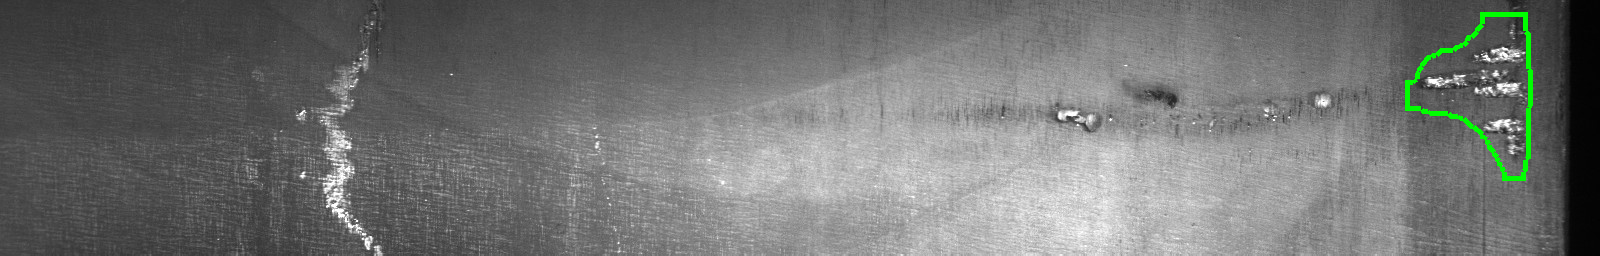

In [36]:
test_img = img_names[6]  # 테스트 이미지 목록에서 7번째 이미지 파일 경로를 선택 (인덱스는 0부터 시작)
img = Image.open(test_img)  # PIL을 사용하여 선택한 테스트 이미지를 열기
draw = ImageDraw.Draw(img)  # 이미지에 그리기 위해 ImageDraw 객체 생성

pred_results = model(test_img)  # 로드된 YOLO 모델을 사용하여 선택된 이미지에 대해 예측 수행

# 예측 결과에서 첫 번째 결과(pred_results[0])의 마스크가 존재하는지 확인
if pred_results[0].masks:
    masks = pred_results[0].masks.cpu()  # 마스크 데이터를 GPU에서 CPU로 이동하여 사용
    for mask in masks:  # 각 마스크에 대해 반복
        # maskt = mask.data[0].numpy()  # 주석 처리된 코드: 마스크 데이터를 NumPy 배열로 변환
        for polygon in mask.xy:  # 마스크의 다각형 좌표(polygon)를 반복
            # mask_img = Image.fromarray(maskt,"I")  # 주석 처리된 코드: NumPy 배열을 이미지로 변환
            draw.polygon(polygon, outline=(0, 255, 0), width=5)  # 다각형을 초록색(0, 255, 0)으로 윤곽선 그리기, 두께는 5픽셀

img  # 이미지 출력
